In [1]:
import pandas as pd

# Load the messy customer orders data
df = pd.read_csv('Messy_Customer_Orders_Test.csv')

# Clean the column names
df.columns = df.columns.str.title().str.strip().str.replace(" ","_")
print("Column names cleaned:", df.columns.tolist())


Column names cleaned: ['Customer_Name', 'Product_Category', 'Order_Date', 'Amount', 'Order_Id']


In [ ]:
if 'Customer_Name' in df.columns:
    df['Customer_Name']=df['Customer_Name'].astype(str).str.strip().str.replace(" ","_").str.title()

if 'Order_Date' in df.columns:
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

if 'Product_Category' in df.columns:
    df['Product_Category'] = df['Product_Category'].astype(str).str.strip().str.title()

if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

if 'Order_Id' in df.columns:
    df['Order_Id'] = df['Order_Id'].astype(str).str.strip().str.replace(" ","_").str.title()

#drop rows with any NaN values in the specified columns

df.dropna(subset=['Customer_Name', 'Order_Date', 'Product_Category', 'Amount', 'Order_Id'], inplace=True)
df.replace('Nan', pd.NA, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print("Final cleaned data:")
print(df)


# Save the cleaned data to a new CSV file
df.to_csv('cleaned_orders.csv', index=False)


Final cleaned data:
          Customer_Name Product_Category Order_Date  Amount  Order_Id
0          Megan_Herman   Home Appliance 2025-03-07  745.52  Ord58529
1      Caleb_Mercado_Md             Toys 2024-12-20  879.76  Ord60230
2    Charles_Carter_Phd      Electronics 2024-08-20  329.04  Ord56714
3             Sean_Park             Toys 2024-01-07   70.74  Ord52529
4          Ashley_Johns             Toys 2025-03-24  861.58  Ord63472
..                  ...              ...        ...     ...       ...
637         Joseph_Hunt      Electronics 2025-07-17  340.16  Ord80559
638     Alejandro_Blake   Home Appliance 2024-12-07  207.91  Ord77683
639     Melissa_Collins             Toys 2024-06-29   23.56  Ord31247
640        Debbie_Stark             Toys 2025-08-04   19.68  Ord18800
641         Susan_Gomez   Home Appliance 2025-05-13  447.48  Ord83226

[642 rows x 5 columns]


In [3]:
# Total spending per product category.
total_spending = df.groupby('Product_Category')['Amount'].sum().reset_index()
print("Total spending per product category:")
print(total_spending)
total_spending.to_csv('total_spending_per_category.csv', index=False)


Total spending per product category:
  Product_Category    Amount
0      Electronics  81733.08
1        Furniture  79400.47
2   Home Appliance  72252.57
3             Toys  79554.83


In [4]:
#Monthly sales trend.
if 'Order_Date' in df.columns:
    df['Order_Month'] = df['Order_Date'].dt.to_period('M')
    monthly_sales = df.groupby('Order_Month')['Amount'].sum().reset_index()
    print("Monthly sales trend:")
    print(monthly_sales)
    monthly_sales.to_csv('monthly_sales_trend.csv', index=False)

Monthly sales trend:
   Order_Month    Amount
0      2023-08   7522.45
1      2023-09  14030.13
2      2023-10  10594.81
3      2023-11  13172.58
4      2023-12  13682.08
5      2024-01  13293.13
6      2024-02  14497.88
7      2024-03  14716.74
8      2024-04  11396.31
9      2024-05  10853.46
10     2024-06   8990.32
11     2024-07  12889.54
12     2024-08  16957.29
13     2024-09  10879.88
14     2024-10  20166.16
15     2024-11  10004.00
16     2024-12  16755.00
17     2025-01   7562.94
18     2025-02  10663.00
19     2025-03  15972.93
20     2025-04  14781.43
21     2025-05  15190.26
22     2025-06  13360.50
23     2025-07  12890.53
24     2025-08   2117.60


In [5]:
#Top 5 customers by total amount spent.
top_customers = df.groupby('Customer_Name')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(5)
print("Top 5 customers by total amount spent:")
print(top_customers)
top_customers.to_csv('top_5_customers.csv', index=False)

Top 5 customers by total amount spent:
        Customer_Name  Amount
189    Diamond_Peters  997.36
231  Garrett_Thompson  996.58
452      Mercedes_Ali  995.66
583     Stephen_Scott  994.56
386    Kristi_Rush_Md  994.52


C:\Users\ksa\AppData\Local\Temp\ipykernel_14444\2917490500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Amount', data=total_spending, palette='viridis')


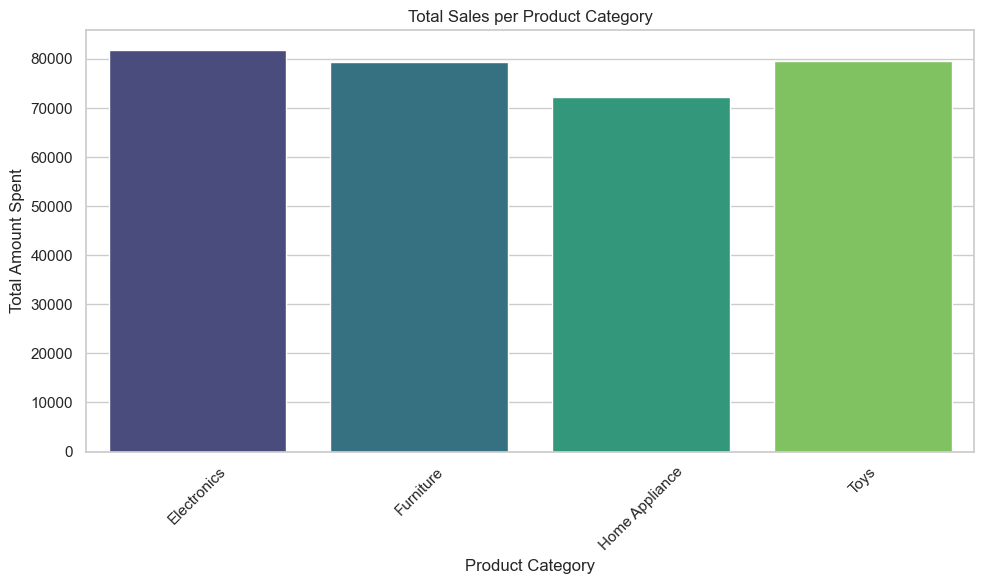

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# Bar chart of total sales per product category.
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Amount', data=total_spending, palette='viridis')
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_sales_per_category.png')
plt.show()

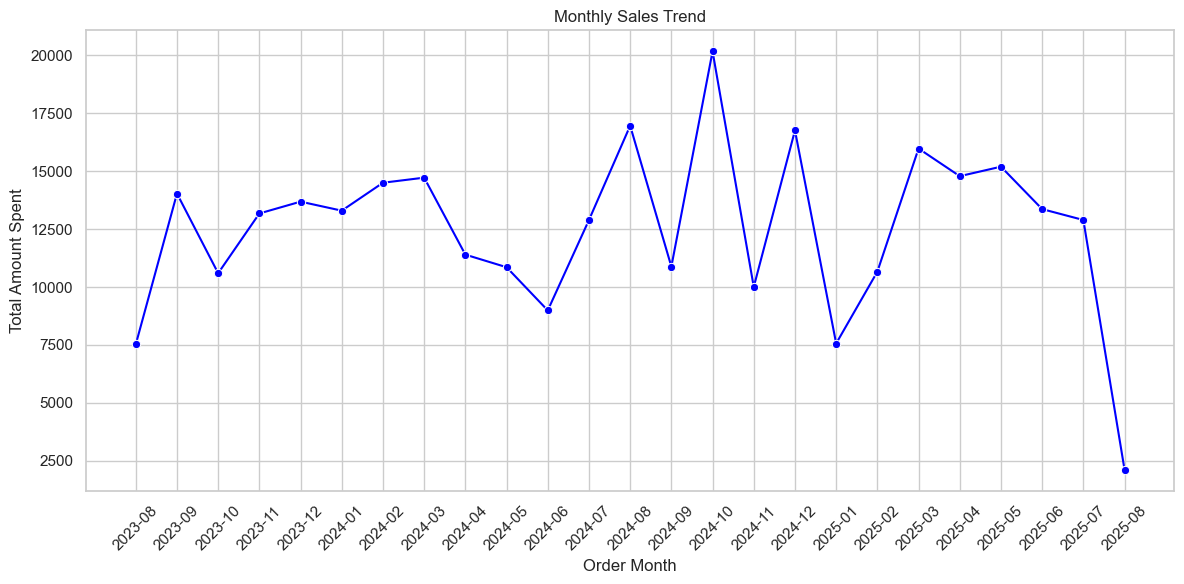

In [7]:
# Line chart of monthly sales trend.
monthly_sales['Order_Month'] = monthly_sales['Order_Month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Month', y='Amount', data=monthly_sales, marker='o', color='blue')
plt.xticks(monthly_sales['Order_Month'].astype(str), rotation=45)
plt.xticks(rotation=45)                                                                                                                         
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

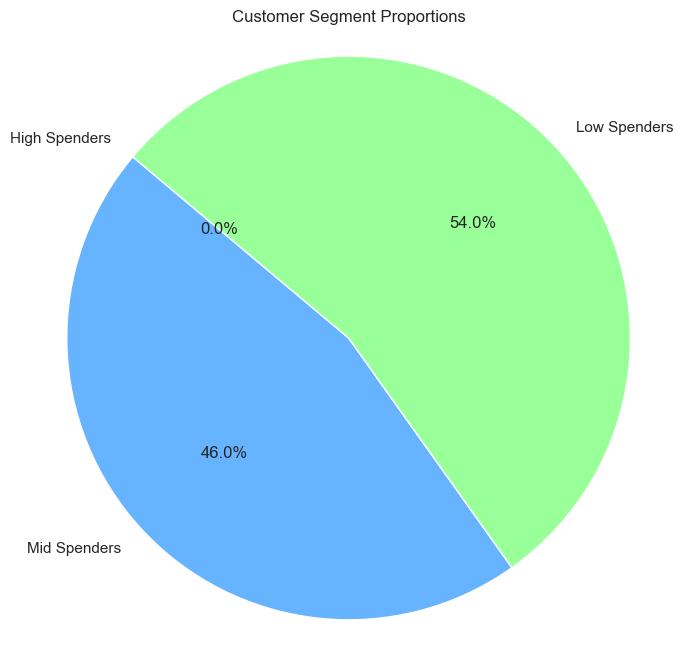

In [8]:
# Pie chart of customer segment proportions (high/mid/low spenders).
high_spenders = df[df['Amount'] > 2000]
mid_spenders = df[(df['Amount'] <= 2000) & (df['Amount'] > 500)]
low_spenders = df[df['Amount'] <= 500] 
spender_counts = [len(high_spenders), len(mid_spenders), len(low_spenders)]
spender_labels = ['High Spenders', 'Mid Spenders', 'Low Spenders']
plt.figure(figsize=(8, 8))
plt.pie(spender_counts, labels=spender_labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Customer Segment Proportions')
plt.axis('equal')
plt.savefig('customer_segment_proportions.png')
plt.show()

In [9]:
import os
import shutil
# create a output folder
output_folder = 'Output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Move all output files to the output folder
for file_namee in [
    'cleaned_orders.csv','total_spending_per_category.csv',
    'monthly_sales_trend.csv','top_5_customers.csv',
    'total_sales_per_category.png','monthly_sales_trend.png',
    'customer_segment_proportions.png'
]:
    if os.path.exists(file_namee):
        shutil.move(file_namee, os.path.join('Output', file_namee))
        print(f"Moved {file_namee} to Output folder.")
        


Moved cleaned_orders.csv to Output folder.
Moved total_spending_per_category.csv to Output folder.
Moved monthly_sales_trend.csv to Output folder.
Moved top_5_customers.csv to Output folder.
Moved total_sales_per_category.png to Output folder.
Moved monthly_sales_trend.png to Output folder.
Moved customer_segment_proportions.png to Output folder.
